**Naive** **Bayes**

1. Prepare a classification model using Naive Bayes for salary data
Data Description:

age -- age of a person

workclass-- A work class is a grouping of work

education-- Education of an individuals

maritalstatus -- Marital status of an individulas

occupation-- occupation of an individuals

relationship --

race -- Race of an Individual

sex -- Gender of an Individual

capitalgain -- profit received from the sale of an investment

capitalloss -- A decrease in the value of a capital asset

hoursperweek -- number of hours work per week

native -- Native of an individual

Salary -- salary of an individual


In [15]:
!pip install sklearn


In [18]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [22]:
# Load Dataset Train
salarydata_train = pd.read_csv("/content/SalaryData_Train(1).csv")
salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K


In [25]:
# Load Dataset Test
salarydata_test = pd.read_csv("/content/SalaryData_Test (1).csv")
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


Exploratory Data Analysis

In [26]:
salarydata_train.shape

(9324, 14)

In [27]:
salarydata_test.shape

(15060, 14)

In [28]:
# Top 5 Rows of datasets

salarydata_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0.0,40.0,Cuba,<=50K


In [29]:
salarydata_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [30]:
# Summary of Train dataset
salarydata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            9324 non-null   int64  
 1   workclass      9324 non-null   object 
 2   education      9324 non-null   object 
 3   educationno    9324 non-null   int64  
 4   maritalstatus  9324 non-null   object 
 5   occupation     9324 non-null   object 
 6   relationship   9324 non-null   object 
 7   race           9324 non-null   object 
 8   sex            9324 non-null   object 
 9   capitalgain    9324 non-null   int64  
 10  capitalloss    9323 non-null   float64
 11  hoursperweek   9323 non-null   float64
 12  native         9323 non-null   object 
 13  Salary         9323 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1019.9+ KB


In [31]:
salarydata_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,9324.000000,9324.000000,9324.000000,9323.000000,9323.000000
mean,38.332475,10.114329,1088.631810,88.521935,41.078086
std,13.095518,2.529587,7428.219122,401.278147,11.886365
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2824.000000,99.000000


In [32]:
# Summary of Test dataset

salarydata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [33]:
salarydata_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [34]:
# finding the spacial characters in the data frame

salarydata_train.isin(['?']).sum(axis = 0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [35]:
salarydata_test.isin(['?']).sum(axis = 0)

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [36]:
print(salarydata_train[0:5])

   age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0          0.0          40.0   United-States   <=50K  
1          0

Explore Categorical Variavles

In [37]:
# Find categorical Variables
categorical = [var for var in salarydata_train.columns if salarydata_train[var].dtype == 'O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)


There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


In [38]:
# view the categorical variables

salarydata_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native,Salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


Summary of categorical variables

There are 9 categorical variables.

The categorical variables are given by workclass, education, maritalstatus, occupation, relationship, race, sex, native and Salary.

Salary is the target variable.

Explore problems with **categorical** **varibales**

In [39]:
# check missing values in categorical varibales

salarydata_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           1
Salary           1
dtype: int64

In [40]:
# view fequency counts of values in categorivcal variables

for var in categorical:
  print(salarydata_train[var].value_counts())

 Private             6883
 Self-emp-not-inc     798
 Local-gov            643
 State-gov            396
 Self-emp-inc         336
 Federal-gov          266
 Without-pay            2
Name: workclass, dtype: int64
 HS-grad         3050
 Some-college    2114
 Bachelors       1547
 Masters          506
 Assoc-voc        387
 11th             326
 Assoc-acdm       303
 10th             266
 7th-8th          180
 Prof-school      169
 9th              142
 Doctorate        105
 12th              97
 5th-6th           77
 1st-4th           43
 Preschool         12
Name: education, dtype: int64
 Married-civ-spouse       4319
 Never-married            3018
 Divorced                 1323
 Separated                 300
 Widowed                   243
 Married-spouse-absent     115
 Married-AF-spouse           6
Name: maritalstatus, dtype: int64
 Prof-specialty       1232
 Exec-managerial      1204
 Craft-repair         1195
 Adm-clerical         1180
 Sales                1173
 Other-service      

In [41]:
# view frequency distribution of categorical variables

for var in categorical:

    print(salarydata_train[var].value_counts()/np.float(len(salarydata_train)))

 Private             0.738202
 Self-emp-not-inc    0.085586
 Local-gov           0.068962
 State-gov           0.042471
 Self-emp-inc        0.036036
 Federal-gov         0.028529
 Without-pay         0.000215
Name: workclass, dtype: float64
 HS-grad         0.327113
 Some-college    0.226727
 Bachelors       0.165916
 Masters         0.054269
 Assoc-voc       0.041506
 11th            0.034964
 Assoc-acdm      0.032497
 10th            0.028529
 7th-8th         0.019305
 Prof-school     0.018125
 9th             0.015230
 Doctorate       0.011261
 12th            0.010403
 5th-6th         0.008258
 1st-4th         0.004612
 Preschool       0.001287
Name: education, dtype: float64
 Married-civ-spouse       0.463213
 Never-married            0.323681
 Divorced                 0.141892
 Separated                0.032175
 Widowed                  0.026062
 Married-spouse-absent    0.012334
 Married-AF-spouse        0.000644
Name: maritalstatus, dtype: float64
 Prof-specialty       0.13213

In [42]:
# check labels in workclass variable

salarydata_train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [43]:
# check frequency distribution of values in workclass variable

salarydata_train.workclass.value_counts()

 Private             6883
 Self-emp-not-inc     798
 Local-gov            643
 State-gov            396
 Self-emp-inc         336
 Federal-gov          266
 Without-pay            2
Name: workclass, dtype: int64

In [44]:
## Explore Occupation Variable

salarydata_train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [45]:
# check frequency distribution of values in occupation variable

salarydata_train.occupation.value_counts()

 Prof-specialty       1232
 Exec-managerial      1204
 Craft-repair         1195
 Adm-clerical         1180
 Sales                1173
 Other-service        1011
 Machine-op-inspct     616
 Transport-moving      501
 Handlers-cleaners     395
 Farming-fishing       294
 Tech-support          281
 Protective-serv       198
 Priv-house-serv        42
 Armed-Forces            2
Name: occupation, dtype: int64

In [46]:
## Explore Native_Country Variable

# check labels in native_country variable

salarydata_train.native.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', nan], dtype=object)

In [47]:
# check frequency distribution of values in native_country variable

salarydata_train.native.value_counts()

 United-States                 8476
 Mexico                         197
 Philippines                     49
 Canada                          43
 Germany                         41
 Puerto-Rico                     36
 Cuba                            32
 Jamaica                         30
 El-Salvador                     29
 England                         28
 China                           27
 India                           26
 South                           24
 Dominican-Republic              23
 Vietnam                         22
 Iran                            21
 Poland                          20
 Guatemala                       20
 Japan                           19
 Italy                           18
 Greece                          17
 Taiwan                          16
 Haiti                           14
 Portugal                        11
 Columbia                        10
 Nicaragua                        9
 Ecuador                          7
 Thailand                   

Number of labels:Cardinality

In [48]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(salarydata_train[var].unique()), ' labels')

workclass  contains  7  labels
education  contains  16  labels
maritalstatus  contains  7  labels
occupation  contains  14  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native  contains  41  labels
Salary  contains  3  labels


In [49]:
## Explore Numerical Variables

# find numerical variables

numerical = [var for var in salarydata_train.columns if salarydata_train[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 5 numerical variables

The numerical variables are : ['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']


In [50]:
# view the numerical variables

salarydata_train[numerical].head()

,age,educationno,capitalgain,capitalloss,hoursperweek
0,39,13,2174,0.0,40.0
1,50,13,0,0.0,13.0
2,38,9,0,0.0,40.0
3,53,7,0,0.0,40.0
4,28,13,0,0.0,40.0


Summary of numerical variables

There are 5 numerical variables.

These are given by age, educationno, capitalgain, capitalloss and hoursperweek. All of the numerical variables are of discrete data type.

Explore problems within numerical variables

In [51]:
# check missing values in numerical variables

salarydata_train[numerical].isnull().sum()

age             0
educationno     0
capitalgain     0
capitalloss     1
hoursperweek    1
dtype: int64

In [55]:
X = salarydata_train.drop(['Salary'], axis=1)

Y = salarydata_train['Salary']


Split data into separate training and test set

In [56]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [57]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((6526, 13), (2798, 13))

Feature Engineering

In [58]:
X_train.dtypes

age                int64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss      float64
hoursperweek     float64
native            object
dtype: object

In [59]:
X_test.dtypes

age                int64
workclass         object
education         object
educationno        int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss      float64
hoursperweek     float64
native            object
dtype: object

In [60]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [61]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

In [62]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass        0.0
education        0.0
maritalstatus    0.0
occupation       0.0
relationship     0.0
race             0.0
sex              0.0
native           0.0
dtype: float64

In [63]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [64]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native'].fillna(X_train['native'].mode()[0], inplace=True)

In [65]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [66]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass        0
education        0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
native           0
dtype: int64

In [67]:
# check missing values in X_train

X_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
dtype: int64

In [68]:
# check missing values in X_test

X_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      1
hoursperweek     1
native           0
dtype: int64

In [69]:
# print categorical varibales

categorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [70]:
X_train[categorical].head()

,workclass,education,maritalstatus,occupation,relationship,race,sex,native
4221,Private,HS-grad,Divorced,Exec-managerial,Not-in-family,White,Female,United-States
8934,Private,Some-college,Never-married,Transport-moving,Own-child,White,Male,United-States
3291,Self-emp-not-inc,HS-grad,Never-married,Other-service,Other-relative,White,Male,United-States
475,Private,Some-college,Never-married,Adm-clerical,Not-in-family,Amer-Indian-Eskimo,Female,United-States
5354,Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [71]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.3 MB/s eta 0:00:00


In [72]:
import category_encoders as ce

In [73]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'maritalstatus', 'occupation', 'relationship',
                                 'race', 'sex', 'native'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [74]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
4221,43,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8934,21,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3291,25,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
475,25,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5354,41,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X_train.shape

(6526, 101)

We can see that from the initial 14 columns, we now have 102 columns

In [76]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,education_1,education_2,...,native_30,native_31,native_32,native_33,native_34,native_35,native_36,native_37,native_38,native_39
779,39,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5972,29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3315,24,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4255,30,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3850,18,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X_test.shape

(2798, 101)

In [83]:
df = pd.DataFrame(X_train)
cols = df.columns

We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called feature scaling.

**Feature** **Scalling**

In [84]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [85]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [86]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [87]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.315789,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.842105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.631579,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.631579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.210526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have X_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

**Model** **Training**

In [88]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

Predict the result

In [90]:
# Identify the NaN values
nan_mask = np.isnan(X_test)

# Replace the NaN values with a default value
X_test[nan_mask] = 0

In [91]:
y_pred = gnb.predict(X_test)

y_pred


array([' >50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' >50K'],
      dtype='<U6')

Check accuracy score

In [103]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the string labels to numeric values
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_encoded = le.transform(y_pred)

print('Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test_encoded, y_pred_encoded)))


Model accuracy score: 0.7927


Compare the train-set and test - set accuracy

In [104]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [105]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8020


Check for overfitting and underfitting

In [118]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Encode the string labels to numeric values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the test set score
test_score = accuracy_score(y_test_encoded, y_pred_encoded)

# Print the test set score
print('Test set score: {:.4f}'.format(test_score))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))




Test set score: 0.7927
Training set score: 0.8020


The training-set accuracy score is 0.8023 while the test-set accuracy to be 0.7995. These two values are quite comparable. So, there is no sign of overfitting

Compare model fitting accuracy with null accuracy

In [119]:
# check class distribution in test set

y_test.value_counts()

 <=50K    2130
 >50K      667
Name: Salary, dtype: int64

In [120]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


We can see that our model accuracy score is 0.8023 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels

Confusion Matrix

In [125]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode the string labels to numeric values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[1672  458    0]
 [ 121  546    0]
 [   1    0    0]]


In [127]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_encoded, y_pred_encoded)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1672  458    0]
 [ 121  546    0]
 [   1    0    0]]

True Positives(TP) =  1672

True Negatives(TN) =  546

False Positives(FP) =  458

False Negatives(FN) =  121


<Axes: >

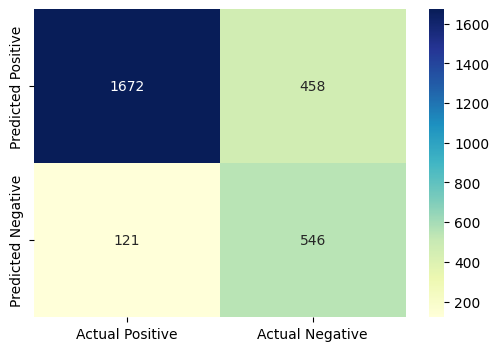

In [138]:
import seaborn as sns

# Create a DataFrame for the binary confusion matrix
cm_binary = cm[:2, :2]
cm_matrix = pd.DataFrame(data=cm_binary, columns=['Actual Positive', 'Actual Negative'],
                         index=['Predicted Positive', 'Predicted Negative'])

# Visualize the binary confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')



Classification Matrix

In [148]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Create a confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Encode the string labels to numeric values
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Print the confusion matrix
print('Confusion Matrix:')
print(cm)

# Print the confusion matrix
print(cm)

print(classification_report(y_test_encoded, y_pred_encoded))


Confusion Matrix:
[[1672  458    0]
 [ 121  546    0]
 [   1    0    0]]
[[1672  458    0]
 [ 121  546    0]
 [   1    0    0]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      2130
           1       0.54      0.82      0.65       667
           2       0.00      0.00      0.00         1

    accuracy                           0.79      2798
   macro avg       0.49      0.53      0.50      2798
weighted avg       0.84      0.79      0.80      2798



Classification Accuracy

In [149]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [150]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7930


Classification Error

In [151]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2070


In [152]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.7850


**Recall**

In [153]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9325


True Positive Rate

True Positive Rate is synonymous with Recall.

In [154]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9325


False positive rate

In [155]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4562


Specificity

In [156]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5438


In [157]:
# Calculate class probabilities

# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(X_test)[0:10]

y_pred_prob

array([[2.05756183e-02, 9.79424382e-01],
       [6.79116311e-01, 3.20883689e-01],
       [9.99999981e-01, 1.88938744e-08],
       [5.58354546e-01, 4.41645454e-01],
       [9.99999994e-01, 5.66528980e-09],
       [9.99763904e-01, 2.36095996e-04],
       [9.16781797e-01, 8.32182027e-02],
       [4.85962799e-02, 9.51403720e-01],
       [9.99990257e-01, 9.74271614e-06],
       [9.99999992e-01, 8.39458251e-09]])

Observations

In each row, the numbers sum to 1.

There are 2 columns which correspond to 2 classes - <=50K and >50K.

  * Class 0 => <=50K - Class that a person makes less than equal to 50K.

  * Class 1 => >50K - Class that a person makes more than 50K.

Importance of predicted probabilities

We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
predict_proba process

Predicts the probabilities

Choose the class with the highest probability

Classification threshold level

There is a classification threshold level of 0.5.

Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.

In [158]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,0.020576,9.794244e-01
1,0.679116,3.208837e-01
2,1.000000,1.889387e-08
3,0.558355,4.416455e-01
4,1.000000,5.665290e-09
5,0.999764,2.360960e-04
6,0.916782,8.321820e-02
7,0.048596,9.514037e-01
8,0.999990,9.742716e-06
9,1.000000,8.394583e-09


In [159]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(X_test)[0:10, 1]

array([9.79424382e-01, 3.20883689e-01, 1.88938744e-08, 4.41645454e-01,
       5.66528980e-09, 2.36095996e-04, 8.32182027e-02, 9.51403720e-01,
       9.74271614e-06, 8.39458251e-09])

In [160]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

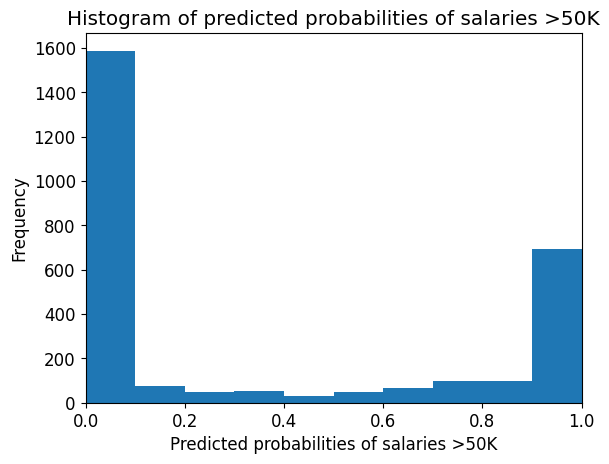

In [161]:
# plot histogram of predicted probabilities


# adjust the font size
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

ROC - AUC CURVES

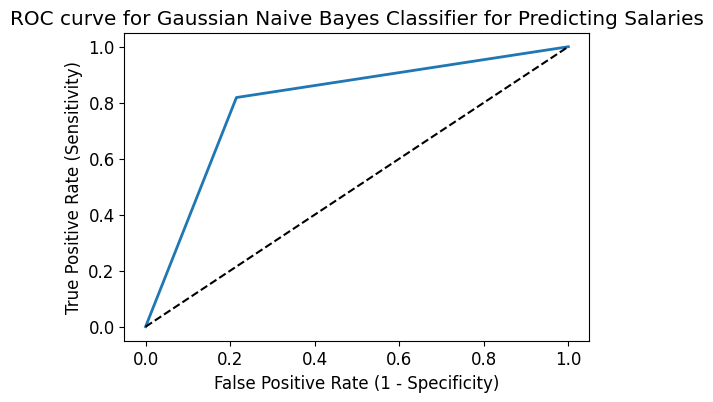

In [173]:
from sklearn.metrics import classification_report

# Combine the training and test labels
all_labels = np.concatenate((y_train, y_test))

# Fit the LabelEncoder on all labels
label_encoder.fit(all_labels)

# Encode the predicted and true labels
y_pred_encoded = label_encoder.transform(y_pred)
y_test_encoded = label_encoder.transform(y_test)

# Generate the classification report
report = classification_report(y_test_encoded, y_pred_encoded)

# Print the classification report
#print('Classification Report:')
#print(report)
from sklearn.metrics import roc_curve

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_encoded, pos_label=1)

# Plot the ROC curve
plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


In [238]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Binarize the true labels and predicted labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test_encoded)
y_pred1_bin = lb.transform(y_pred_encoded)

# Calculate the multi-class ROC AUC score
roc_auc = roc_auc_score(y_test_bin, y_pred1_bin, average='weighted')

# Print the multi-class ROC AUC score
print(' ROC AUC Score: {:.4f}'.format(roc_auc))


 ROC AUC Score: 0.8012


Interpretation

In [201]:
# calculate cross-validated ROC AUC

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))


Cross validated ROC AUC : 0.8900


K-Fold Cross Validation

In [239]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.81163859 0.79632466 0.79326187 0.80704441 0.79479326 0.77947933
 0.79601227 0.80521472 0.80828221 0.81748466]


In [240]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8010
